# Assignment 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown
import statsmodels.tsa.api as tsa
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics import tsaplots
from statsmodels.tsa.arima.model import ARIMA
import warnings

warnings.filterwarnings("ignore")

## 1. Consider the monthly simple returns 

of the CRSP Decile 1 and 9 portfolios from January 1970 to December 2006. 

The portfolios consist of NYSE/AMEX/NASDAQ stocks based on market capitalization and rebalanced annually. See CRSP (via WRDS) for more information. The data are in m-dec19.txt with date, Decile-1 return, and Decile-9 return in three columns.

### (a) Compute the first 24 lags of ACF and PACF of the simple return series of Decile 1 portfolio.

In [2]:
mdec19 = pd.read_csv("data/m-dec19.csv",index_col="date")
mdec19.index = pd.to_datetime(mdec19.index,format="%Y%m%d")
mdec19

,dec1,dec9
date,,
1970-01-30,0.05438,-0.07308
1970-02-27,0.02026,0.06419
1970-03-31,-0.03179,-0.00403
1970-04-30,-0.18477,-0.11582
1970-05-29,-0.08819,-0.08557
...,...,...
2006-08-31,-0.00685,0.02572
2006-09-29,0.00628,0.01112
2006-10-31,0.03864,0.04285


In [3]:
mdec19.dec9

date
1970-01-30   -0.07308
1970-02-27    0.06419
1970-03-31   -0.00403
1970-04-30   -0.11582
1970-05-29   -0.08557
               ...   
2006-08-31    0.02572
2006-09-29    0.01112
2006-10-31    0.04285
2006-11-30    0.03836
2006-12-29    0.00271
Name: dec9, Length: 444, dtype: float64

In [4]:
tsa.acf(mdec19.dec1,nlags=24)

array([ 1.        ,  0.22456128, -0.00215612, -0.07622322, -0.02973589,
       -0.02236116, -0.05065079, -0.0503511 , -0.08492762, -0.07922587,
       -0.00448568,  0.07566051,  0.26752714,  0.01766952, -0.05160729,
       -0.09218498, -0.02438723, -0.04173056, -0.09113585, -0.08018132,
       -0.05086801, -0.05762566, -0.04871422,  0.05264791,  0.24732463])

In [5]:
tsa.pacf(mdec19.dec1,nlags=24)

array([ 1.        ,  0.22506819, -0.05564005, -0.06731191,  0.00318794,
       -0.02068808, -0.05085435, -0.03236082, -0.07657688, -0.05768586,
        0.01680366,  0.06200173,  0.24655303, -0.10950884, -0.03024777,
       -0.05944057, -0.00383516, -0.0492873 , -0.07295287, -0.0370297 ,
       -0.00110313, -0.05059673, -0.06483611,  0.03969557,  0.17896128])

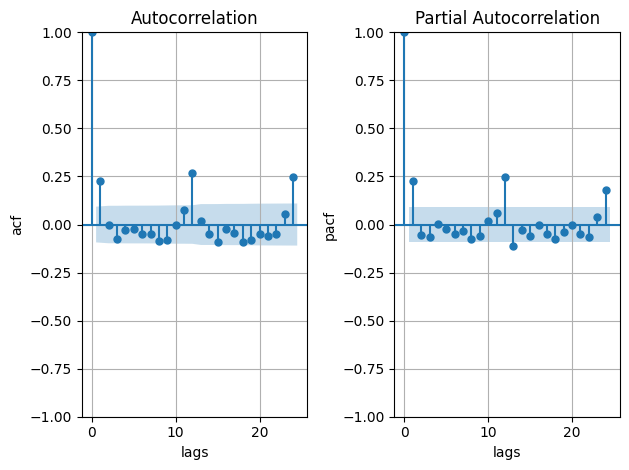

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2)

tsaplots.plot_acf(mdec19.dec1,lags=24,ax=ax1)
ax1.set_xlabel("lags")
ax1.set_ylabel("acf")
ax1.grid("True")

tsaplots.plot_pacf(mdec19.dec1,lags=24,ax=ax2)
ax2.set_xlabel("lags")
ax2.set_ylabel("pacf")
ax2.grid("True")

fig.tight_layout()
plt.show()

### (b) Test the hypothesis that the first 12 lags of ACF are zero. 

That is, $H_0:ρ_1 =···=ρ_{12}=0$ versus $H_1:ρ_i\neq 0$ forsome $1≤i≤12$. Draw your conclusion.

Use `Ljung-Box` Test:

In [7]:
acorr_ljungbox(mdec19.dec1,lags=[12])

,lb_stat,lb_pvalue
12,69.652382,3.720227e-10


**Conclusion:**

From the result, we can see p-value is only 3.72e-10 << $\alpha$. If we choose a $\alpha$ equals to 0.01 or other common signficance value. 

Thus we can reject $H_0$ and accept $H_1$. 

## 2. Consider the monthly simple returns of the CRSP Decile 9 portfolio in Problem 1.
### (a) Compute the ACF of the simple returns for the first 12 lags.

In [8]:
tsa.acf(mdec19.dec9,nlags=12)

array([ 1.        ,  0.1366922 , -0.06237143, -0.03337735, -0.05910569,
       -0.0090983 ,  0.00276946, -0.01111476, -0.07820778, -0.02708135,
        0.04301872, -0.03555275,  0.00529402])

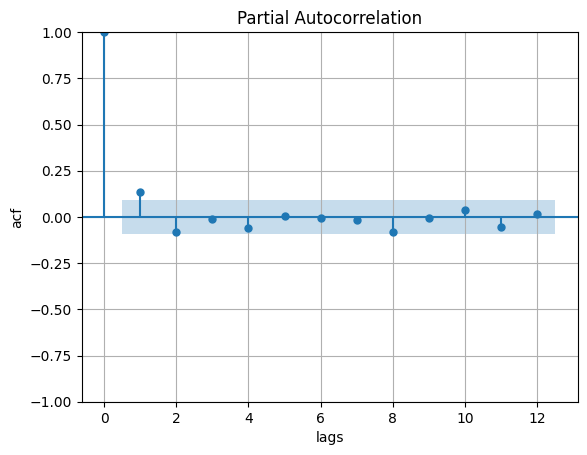

In [9]:
tsaplots.plot_pacf(mdec19.dec9,lags=12,ax=plt.gca())
plt.xlabel("lags")
plt.ylabel("acf")
plt.grid(True)
plt.show()


### (b) Test the hypothesis that all 12 ACFs are zero. 
That is, $H_0:ρ_1 =···=ρ_{12}=0$ versus $H_1:ρ_i\neq 0$ forsome $1≤i≤12$. Draw your conclusion.

Use `Ljung-Box` Test:

In [10]:
acorr_ljungbox(mdec19.dec9,lags=[12])

,lb_stat,lb_pvalue
12,16.811541,0.156825


**Conclusion**:

From the result, we can see the p-value is about $0.15$ > $\alpha=0.01$ or $\alpha=0.05$. 

Thus we can't reject the null hypothesis $H_0$.

### 3. Consider the monthly U.S. Consumer Price Index Less Engery 

from January 1, 1957 to February 2, 2007. The data are seasonally adjusted and obtained from the Federal Reserve Bank at St Louis. The origin of the data is U.S. Department of Labors, Bureau of Labot Statistics. The data file is m-cpileng.txt (in year, mm, dd, cpi format).

Compute the percentage growth rate series of CPI defined as $c_t = 100[\ln(X_t)− \ln(X_{t−1})]$, where $X_t$ denotes the $t^{th}$ observation of CPI.

In [11]:
cpileng = pd.read_csv("data/m-cpileng.csv",index_col="date")
cpileng

,cpi
date,
1957-01-01,28.400
1957-02-01,28.500
1957-03-01,28.600
1957-04-01,28.600
1957-05-01,28.700
...,...
2006-10-01,205.300
2006-11-01,205.500
2006-12-01,205.800


In [12]:
c = 100*np.log(cpileng.cpi).diff()[1:]
c

date
1957-02-01    0.351494
1957-03-01    0.350263
1957-04-01    0.000000
1957-05-01    0.349040
1957-06-01    0.347826
                ...   
2006-10-01    0.146234
2006-11-01    0.097371
2006-12-01    0.145879
2007-01-01    0.297904
2007-02-01    0.323582
Name: cpi, Length: 601, dtype: float64

### (a) Compute the 12 lags of ACF and PACF of $c_t$. 

Test the null hypothesis that the first 12 lags of ACF are zero. Draw your conclusion.

In [13]:
tsa.acf(c,nlags=12)

array([1.        , 0.5834442 , 0.59637012, 0.55793032, 0.50079595,
       0.56627591, 0.55148108, 0.52988917, 0.55545063, 0.54580214,
       0.56355919, 0.49762566, 0.50298513])

In [14]:
tsa.pacf(c,nlags=12)

array([ 1.        ,  0.58441661,  0.39003075,  0.21402368,  0.07183054,
        0.22557983,  0.16354837,  0.0735764 ,  0.12242671,  0.11973931,
        0.12840863, -0.04477735,  0.0155138 ])

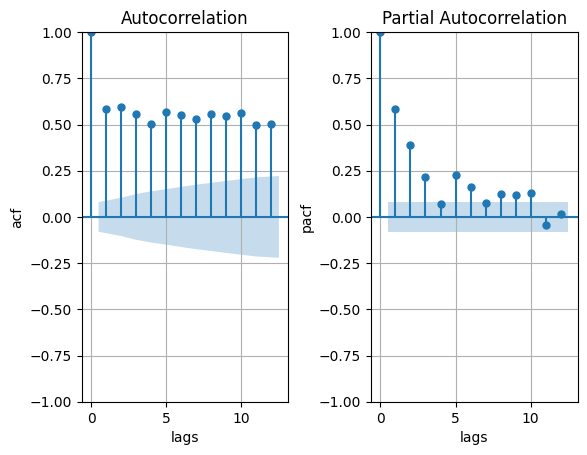

In [15]:

plt.subplot(121)
tsaplots.plot_acf(c,lags=12,ax=plt.gca())
plt.xlabel("lags")
plt.ylabel("acf")
plt.grid("True")

plt.subplot(122)
tsaplots.plot_pacf(c,lags=12,ax=plt.gca())
plt.xlabel("lags")
plt.ylabel("pacf")
plt.grid("True")

plt.subplots_adjust(wspace=0.4)
plt.show()

In [16]:
acorr_ljungbox(c,lags=[12])

,lb_stat,lb_pvalue
12,2186.64584,0.0


**Conclusion**:

From the result, we can see the p-value is such small that underflow and returen a $0.0$ << $\alpha=0.01$ or $\alpha=0.05$. 

Thus we can reject the null hypothesis $H_0$.

### (b) The patterns of ACF and PACF indicate that the $c_t$ series does not follow a simple AR or MA model. 

To gain further insight, compute the first 12 lags of ACF of the differenced series $z_t = c_t − c_{t−1}$.
 

In [17]:
z = c.diff()[1:]
z

date
1957-03-01   -0.001231
1957-04-01   -0.350263
1957-05-01    0.349040
1957-06-01   -0.001214
1957-07-01    0.344218
                ...   
2006-10-01   -0.049078
2006-11-01   -0.048863
2006-12-01    0.048508
2007-01-01    0.152025
2007-02-01    0.025678
Name: cpi, Length: 600, dtype: float64

In [18]:
tsa.acf(z,nlags=12)

array([ 1.        , -0.51552667,  0.06183221,  0.02222489, -0.14716833,
        0.09616349,  0.00837264, -0.05639724,  0.04227394, -0.03310702,
        0.1004575 , -0.08557486,  0.04165747])

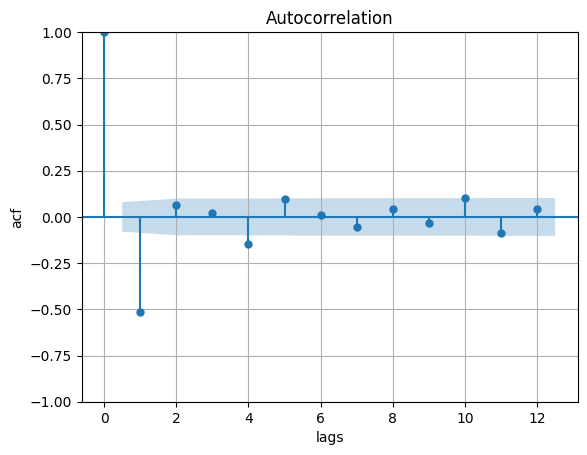

In [19]:
tsaplots.plot_acf(z,lags=12)
plt.xlabel("lags")
plt.ylabel("acf")
plt.grid(True)
plt.show()

### (c) Based on the ACF of $z_t$, one may fit an ARMA(1,5) model for the $c_t$ series. 

Write down the fitted model.

In [20]:
arma15 = ARIMA(c,order=(1,0,5)).fit()
arma15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    cpi   No. Observations:                  601
Model:                 ARIMA(1, 0, 5)   Log Likelihood                 163.605
Date:                Wed, 08 Mar 2023   AIC                           -311.209
Time:                        14:17:24   BIC                           -276.020
Sample:                    02-01-1957   HQIC                          -297.512
                         - 02-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3234      0.087      3.708      0.000       0.152       0.494
ar.L1          0.9782      0.008    119.424      0.000       0.962       0.994
ma.L1         -0.8160      0.032    -25.302      0.000      -0.879      -0.753
ma.L2          0.0652      0.045      1.438      0.150      -0.024       0.154
ma.L3         -0.0997      0.050     -2.013      0.044      -0.197      -0.003
ma.L4         -0.1061      0.053     -2.012      0.044      -0.210      -0.003
ma.L5          0.1913      0.041      4.688      0.000       0.111       0.271
sigma2         0.0339      0.001     27.749      0.000       0.031       0.036
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               673.34
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.12   Skew:                             0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
def series_latex(series,s="s"):
    series_latex = f"{s}_t"
    for i, param in enumerate(series,start=1):
        sign = "+" if param > 0 else "-"
        series_latex += f" {sign} {abs(param)}{s}_{{t-{i}}}"
    return series_latex

def writedown_fitted_model(result,ndigits=3):
    const = round(result.params.const,ndigits=ndigits)
    sigma2 = round(result.params.sigma2,ndigits=ndigits)
    arparams = np.round(result.polynomial_ar[1:],decimals=ndigits)
    maparams = np.round(result.maparams,decimals=ndigits)
    ar_str = series_latex(arparams,s="r")
    ma_str = series_latex(maparams,s="a")
    return Markdown(rf"${ar_str} = {const} + {ma_str}, \hat{{\sigma_a}}^2={sigma2}$")

In [22]:
writedown_fitted_model(arma15)

$r_t - 0.978r_{t-1} = 0.323 + a_t - 0.816a_{t-1} + 0.065a_{t-2} - 0.1a_{t-3} - 0.106a_{t-4} + 0.191a_{t-5}, \hat{\sigma_a}^2=0.034$

## 4. Consider the growth rate of U.S. real GNP series from the $2^{nd}$ quarter of 1947 to the last quarter of 2006. 

The data are in the file q-gnprate.txt.

In [23]:
gnp = pd.read_csv("data/q-gnprate.csv")
gnp

,data
0,0.014173
1,0.016828
2,0.039502
3,0.023967
4,0.026387
...,...
234,0.009248
235,0.022840
236,0.013916
237,0.008969


### (a) Fit an AR(3) model to the series. Write down the fitted model.

In [24]:
ar3 = ARIMA(gnp.data,order=(3,0,0)).fit()
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   data   No. Observations:                  239
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 769.833
Date:                Wed, 08 Mar 2023   AIC                          -1529.666
Time:                        14:17:24   BIC                          -1512.283
Sample:                             0   HQIC                         -1522.661
                                - 239                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0168      0.001     14.275      0.000       0.015       0.019
ar.L1          0.4171      0.053      7.872      0.000       0.313       0.521
ar.L2          0.2002      0.054      3.712      0.000       0.094       0.306
ar.L3         -0.1648      0.049     -3.390      0.001      -0.260      -0.070
sigma2      9.312e-05   6.19e-06     15.036      0.000     8.1e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                46.21
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
writedown_fitted_model(ar3,ndigits=4)

$r_t - 0.4171r_{t-1} - 0.2002r_{t-2} + 0.1648r_{t-3} = 0.0168 + a_t, \hat{\sigma_a}^2=0.0001$

### (b) For the fitted AR(3) model, compute the average period of business cycles if they exist?

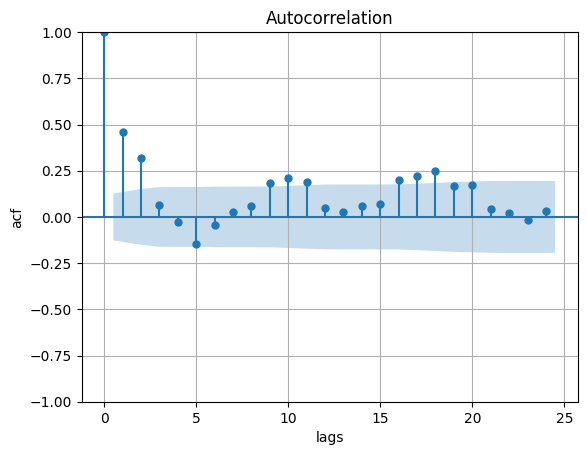

In [26]:
tsaplots.plot_acf(gnp.data,lags=24)
plt.xlabel("lags")
plt.ylabel("acf")
plt.grid(True)
plt.show()

In [27]:
ar3.arroots

array([-1.87099401-0.j        ,  1.54264825-0.92872557j,
        1.54264825+0.92872557j])

The corresponding difference equation has two complex roots, which confirms the existence of business cycle.

In [28]:
root1 = ar3.arroots[1]
a = np.real(root1)
k = (2*np.pi)/(np.arccos(a/np.abs(root1)))
Markdown(rf"The average length of business cycles is $k \approx {k:.4f}$.")

The average length of business cycles is $k \approx 11.5944$.

### c) Compute 1-step to 4-step ahead forecasts 

of the fitted model at the end of the data, i.e. October (or the fourth quarter) of 2006. Write down the forecasts and their standard errors.


In [29]:
forecast_result = ar3.get_forecast(4)
forecast_result.summary_frame()

data,mean,mean_se,mean_ci_lower,mean_ci_upper
239,0.014008,0.009650,-0.004906,0.032921
240,0.016122,0.010456,-0.004371,0.036614
241,0.016661,0.011061,-0.005019,0.038341
242,0.017088,0.011085,-0.004638,0.038814


## 5. Consider the monthly simple return of CRSP Decile 9 portfolio 

from January 1970 to December 2006 of Problem 1.

### (a) Fit an MA(1) model to the series. Write down the fitted model.

In [30]:
ma1 = ARIMA(mdec19.dec9,order=(0,0,1)).fit()
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   dec9   No. Observations:                  444
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 683.033
Date:                Wed, 08 Mar 2023   AIC                          -1360.065
Time:                        14:17:24   BIC                          -1347.778
Sample:                             0   HQIC                         -1355.220
                                - 444                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.003      3.485      0.000       0.005       0.017
ma.L1          0.1593      0.052      3.085      0.002       0.058       0.261
sigma2         0.0027      0.000     22.332      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):               144.47
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                            -0.38
Prob(H) (two-sided):                  0.12   Kurtosis:                         5.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
writedown_fitted_model(ma1)

$r_t = 0.011 + a_t + 0.159a_{t-1}, \hat{\sigma_a}^2=0.003$

### (b) Is the fitted MA(1) model adequate? Why?

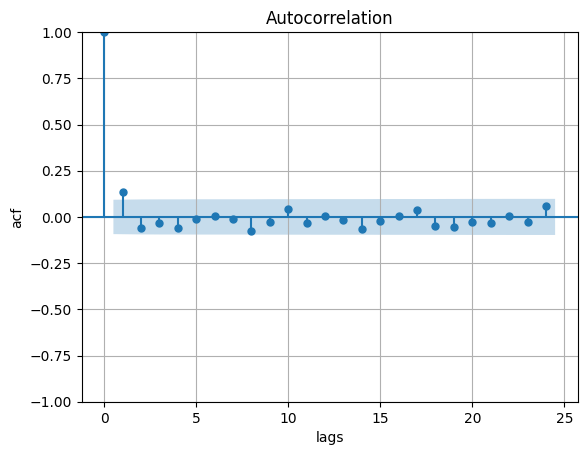

In [32]:
tsaplots.plot_acf(mdec19.dec9,lags=24)
plt.xlabel("lags")
plt.ylabel("acf")
plt.grid(True)
plt.show()

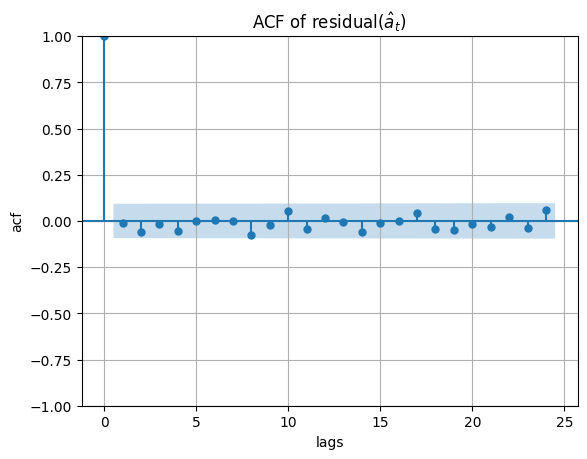

In [33]:
tsaplots.plot_acf(ma1.resid,lags=24)
plt.xlabel("lags")
plt.ylabel("acf")
plt.title(r"ACF of residual($\hat{a}_t$)")
plt.grid(True)
plt.show()

In [34]:
acorr_ljungbox(ma1.resid)

,lb_stat,lb_pvalue
1,0.044783,0.832403
2,1.563664,0.457567
3,1.671446,0.643301
4,3.101801,0.540936
5,3.102095,0.684249
6,3.105974,0.795433
7,3.105975,0.875029
8,5.604731,0.691411
9,5.862833,0.753564
10,7.176595,0.708675


From the result of `ACF plots` and `Ljung-Box Test on residual`, we can assert that $\hat{a}_t$ is white noise which satisifys our assumption.

Thus, we can assert that the fitted `MA(1)` model is adequate.

### (c) Compute 1-step to 4-step ahead forecasts 

of the fitted MA(1) model using the last observation as the forecast origin.

In [35]:
ma1.get_forecast(4).summary_frame()

dec9,mean,mean_se,mean_ci_lower,mean_ci_upper
444,0.009026,0.051953,-0.092799,0.110852
445,0.010896,0.052608,-0.092213,0.114006
446,0.010896,0.052608,-0.092213,0.114006
447,0.010896,0.052608,-0.092213,0.114006
